<a href="https://colab.research.google.com/github/schwaben-github/Python_ExpertCall/blob/master/Python_First_Glance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Python at first glance"

There's one issue that seems to confuse beginners as well as some experienced developers: Python objects. Specifically, the difference between mutable and immutable objects.

### In Python, everything is an object
(*introduction*)

In [ ]:
isinstance(1, object)

In [ ]:
isinstance(False, object)

In [ ]:
def my_func():
   return "hello"

In [ ]:
isinstance(my_func, object)

Python has a built-in function, `id`, which returns the address of an object in memory. For example:

In [ ]:
a = 1

In [ ]:
id(a)

Above, we created an object by the name of `x`, and assigned it the value of `1`. We then used `id(x)` and discovered that this object is found at the address `1470416816` in memory.

This allows us to check interesting things about Python. Let's say we create two variables in Python – one by the name of `x`, and one by the name of `y` – and assign them the same value.

In [ ]:
x = "I love Python!"

In [ ]:
y = "I love Python!"

We can use the equality operator (`==`) to verify that they indeed have the same value in Python's eyes:

In [ ]:
x == y

But are these the same object in memory? In theory, there can be two very different scenarios here.

According to scenario (1), we really have two different objects, one by the name of `x`, and another by the name of `y`, that just happen to have the same value.

Yet, it could also be the case that Python actually stores here only one object, which has two names that reference it – as shown in scenario (2)

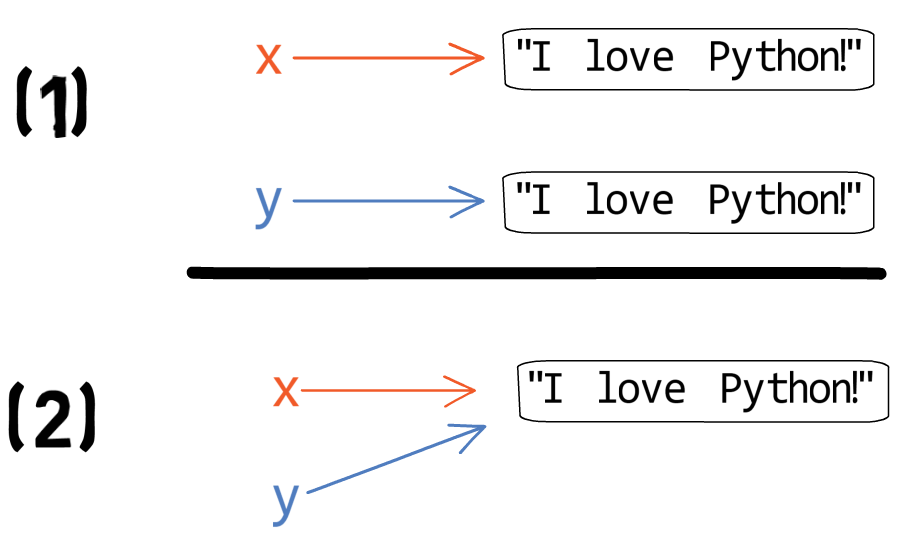

We can use the id function introduced above to check this:

In [ ]:
id(x)

In [ ]:
id(y)

So as we can see, Python's behavior matches scenario (1) described above. Even though `y == z` in this example (that is, `x` and `y` have the same values), they are different objects in memory. This is because `id(x) != id(y)`, as we can verify explicitly:

In [ ]:
id(x) == id(y)

There is a shorter way to make the comparison above, and that is to use Python's `is` operator. Checking whether `x is y` is the same as checking `id(x) == id(y)`, which means whether `x` and y are the same object in memory:

In [ ]:
x == y

In [ ]:
id(x) == id(y)

In [ ]:
x is y

This sheds light on the important difference between the equality operator `==` and the identity operator `is`.

As you can see in the example above, it is completely possible for two names in Python (`x` and `y`) to be bound to two different objects (and thus, `x is y` is `False`), where these two objects have the same value (so `x == y` is `True`).

How can we create another variable that points to the same object that `x` is pointing to? We can simply use the assignment operator =, like so:

In [ ]:
x = "I love Python!"
z = x

To verify that they indeed point to the same object, we can use the is operator:

In [ ]:
x is z

Of course, this means they have the *same address in memory*, as we can verify explicitly by using `id`:

In [ ]:
id(x)
id(z)

And, of course, they have the same value, so we expect `x == z` to return True as well:

In [ ]:
x == z

## Mutable and immutable objects in Python

We have said that everything in Python is an object, yet there is an important distinction between objects. Some objects are *mutable* while some are *immutable*. 

## Immutable objects in Python

For some types in Python, once we have created instances of those types, they never change. They are immutable.

For example, `int` objects are immutable in Python. What will happen if we try to change the value of an `int` object?

In [ ]:
x = 24601
print(x)

In [ ]:
x = 24602
print(x)

Well, it seems that we changed `x` successfully. This is exactly where many people get confused. What exactly happened under the hood here? Let's use `id` to further investigate:

In [ ]:
x = 24601
print(x)

id(x)

In [ ]:
x = 24602
print(x)

id(x)

So we can see that by assigning `x = 24602`, we didn't change the value of the object that `x` had been bound to before. Rather, we created a new object, and bound the name `x` to it!

So after assigning `24601` to `x` by using `x = 24601`, we had the following state:

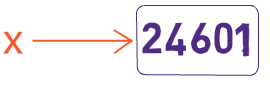

And after using `x = 24602`, we created a *new object*, and bound the name `x` to this new object. The other object with the value of 24601 is no longer reachable by `x` (or any other name in this case):

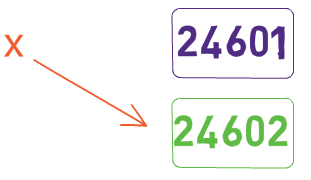

Whenever we assign a new value to a name (in the above example - `x`) that is bound to an int object, we actually change the binding of that name to another object!

The same applies for `tuple`s, `string`s (`str` objects), and `bool`eans as well. In other words, `int` (and other number types such as `float`), `tuple`, `bool`, and `str` objects are **immutable**.

## Want to test the hypothesis?

What happens if we create a `tuple` object (you will learn about tuples in the following week of the course!), and then give it a different value?

In [ ]:
my_tuple = (1, 2, 3)
id(my_tuple)

In [ ]:
my_tuple = (3, 4, 5)
id(my_tuple)

Just like an `int` object, we can see that our assignment actually changed the object that the name `my_tuple` is bound to.

What happens if we try to change one of the tuple's elements?

In [ ]:
my_tuple[0] = 'a new value'

As we can see, Python doesn't allow us to modify `my_tuple`'s contents, as it is immutable.

## Mutable objects in Python

Some types in Python can be modified after creation, and they are called *mutable*. For example, we know that we can modify the contents of a list object:

In [1]:
this_list = [1, 2, 3]

In [2]:
this_list[0] = 'a new value'

In [3]:
this_list

['a new value', 2, 3]

Does that mean we actually created a new object when assigning a new value to the first element of `this_list`? Again, we can use id to check:

In [ ]:
my_list = [1, 2, 3]
id(my_list)

In [ ]:
my_list

In [ ]:
my_list[0] = 'a new value'
id(my_list)

In [ ]:
my_list

So our first assignment `my_list = [1, 2, 3]` created an object in the address `123456789`, with the values of `1`, `2`, and `3`:


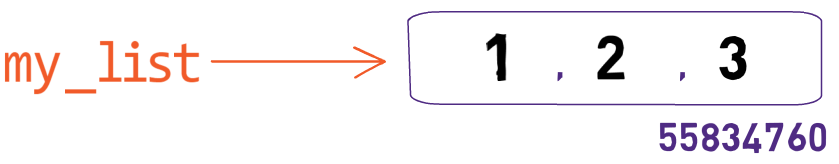

We then modified the first element of this `list` object using `my_list[0] = 'a new value'`, that is - without creating a new `list` object:

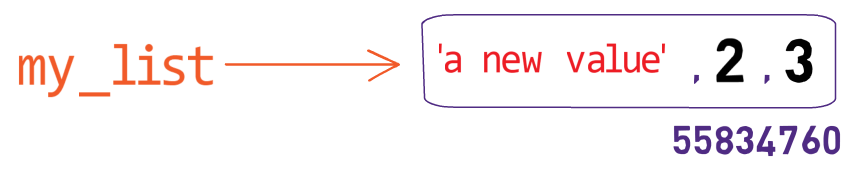

Now, let us create two names – `x` and `y`, both bound to the same `list` object. We can verify that either by using `is`, or by explicitly checking their `id`s:

In [ ]:
x = y = [1, 2]
x is y

In [ ]:
id(x)

In [ ]:
id(y)

In [ ]:
id(x) == id(y)

What happens now if we use `x.append(3)`? That is, if we add a new element (`3`) to the object by the name of `x`?


Will `x` by changed? Will `y`?


Well, as we already know, they are basically two names of the same *object*:

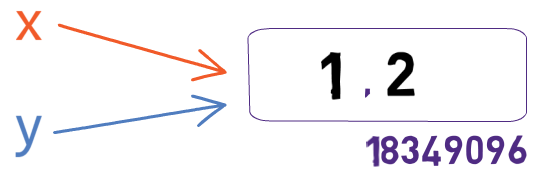

Since this object is changed, when we check its names we can see the new value:

In [ ]:
x.append(3)
x

In [ ]:
y

Note that `x` and `y` have the same `id` as before – as they are still bound to the same `list` object:

In [ ]:
id(x)

In [ ]:
id(y)

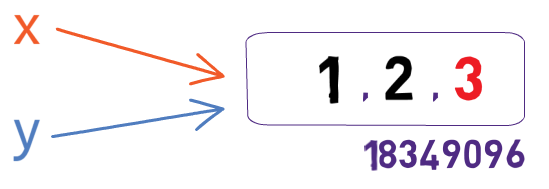

In addition to `list`s, other Python types that are mutable include `set`s and `dict`s.